# Costweet : describe dataset

Ce notebook sert d'exemple pour analyser une un ensemble de cas d'entrainement.

Il fait partie d'une série de notebook permettant de comparer différentes approches de classification en faisant varier les architectures de réseaux de neurones et les méthodes d'encodification des textes.

Ce notebook s'inspire de celui d'emmanuel ameisen 

In [1]:
import numpy as np
import pandas as pd
#from keras.models import Sequential
#from keras.layers import Dense, Embedding, Conv1D, Input, GlobalMaxPooling1D, MaxPooling1D
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.models import Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#for fasttext
from __future__ import print_function
from gensim.models import KeyedVectors






d:\code\ml\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


 DATA PROCESS
 les données ont été saisies sous excel et sauvegardées en csv utf-8 bizarement avec l'option séparateur virgules de microsoft
 


In [2]:
def getDataset():
	dataset = pd.read_csv("RuleCout3.csv", delimiter=";", encoding='utf-8')
	#print ( 'dataset loaded with shape',dataset.shape)
	X = dataset['text']
	Y = dataset['class']
	dataset.set_index('text') #pour avoir les classes dans un ordre quelconque
	return dataset, X, Y

# utile pour les colonnes sur une ligne et afficher toutes les lignes
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 1000)

# on ajoutera peu à peu de nouvelles colonnes au dataset 
dataset, X, Y = getDataset()
print(dataset)

                                                  text  class
0                                à la bonne franquette    éco
1                                      à prix modique     éco
2                              aucun problème d'argent   cher
3                                          avantageux     éco
4                                        bas de gamme     éco
5                                             bas prix    éco
6                                    bistrot pas cher     éco
7                                                  bon   cher
8                                         bon japonais   cher
9                                          bon marché     éco
10                           bon rapport qualité prix   moyen
11                                             burger     éco
12                                       burger classe  moyen
13                                             cantine    éco
14                                             caviar    cher
15      

In [3]:
dataset.describe()

,text,class
count,156,156
unique,149,3
top,bon,éco
freq,2,73


In [4]:
dataset.groupby("class").count()

,text
class,
cher,68
moyen,15
éco,73


In [5]:
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical


MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 10
texts = dataset['text']
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

sentence_lengths = [len(tokens) for tokens in sequences]

#print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

#labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)
dataset['tokens']= list(data)
dataset

Using TensorFlow backend.


Found 172 unique tokens.
Max sentence length is 7
Shape of data tensor: (156, 10)


,text,class,tokens
0,à la bonne franquette,éco,"[0, 0, 0, 0, 0, 0, 21, 22, 79, 80]"
1,à prix modique,éco,"[0, 0, 0, 0, 0, 0, 0, 21, 12, 39]"
2,aucun problème d'argent,cher,"[0, 0, 0, 0, 0, 0, 0, 81, 82, 83]"
3,avantageux,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 84]"
4,bas de gamme,éco,"[0, 0, 0, 0, 0, 0, 0, 30, 3, 13]"
5,bas prix,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 30, 12]"
6,bistrot pas cher,éco,"[0, 0, 0, 0, 0, 0, 0, 85, 2, 4]"
7,bon,cher,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 5]"
8,bon japonais,cher,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 40]"
9,bon marché,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 31]"


In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Le prochain pavé permet de transformer les catégories "éco","moyen" et cher en vecteur.
Ces vecteurs sont rangés dans la colonne 'Ycodes' du dataset

In [7]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
dataset['Ycodes'] = encoder.transform(Y)
dataset


,text,class,tokens,Ycodes
0,à la bonne franquette,éco,"[0, 0, 0, 0, 0, 0, 21, 22, 79, 80]",2
1,à prix modique,éco,"[0, 0, 0, 0, 0, 0, 0, 21, 12, 39]",2
2,aucun problème d'argent,cher,"[0, 0, 0, 0, 0, 0, 0, 81, 82, 83]",0
3,avantageux,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 84]",2
4,bas de gamme,éco,"[0, 0, 0, 0, 0, 0, 0, 30, 3, 13]",2
5,bas prix,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 30, 12]",2
6,bistrot pas cher,éco,"[0, 0, 0, 0, 0, 0, 0, 85, 2, 4]",2
7,bon,cher,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 5]",0
8,bon japonais,cher,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 40]",0
9,bon marché,éco,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 31]",2


In [8]:
# split the data into a training set and a validation set
#VALIDATION_SPLIT = 0.2
#indices = np.arange(data.shape[0])
#np.random.shuffle(indices)
#data = data[indices]
#labels = labels[indices]
#num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])
#x_train = data[:-num_validation_samples]
#y_train = labels[:-num_validation_samples]
#x_val = data[-num_validation_samples:]
#y_val = labels[-num_validation_samples:]
#print("x_train.shape", x_train.shape)
#print("y_train.shape", y_train.shape)
#print("x_val.shape", x_val.shape)
#print("y_val.shape", y_val.shape)



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = dataset["text"]
list_labels = dataset["Ycodes"]

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

print("--------------------------------------------")
print(X_test_counts)


--------------------------------------------
  (0, 140)	1
  (1, 3)	1
  (1, 64)	1
  (1, 94)	1
  (1, 140)	1
  (2, 8)	1
  (2, 121)	1
  (2, 140)	1
  (3, 24)	1
  (3, 94)	1
  (3, 145)	1
  (4, 9)	1
  (4, 108)	1
  (5, 67)	1
  (5, 120)	1
  (5, 140)	1
  (6, 31)	1
  (6, 54)	1
  (6, 59)	1
  (6, 139)	1
  (7, 24)	1
  (7, 36)	1
  (7, 94)	1
  (7, 132)	1
  (8, 39)	1
  :	:
  (20, 98)	1
  (21, 31)	1
  (21, 81)	1
  (21, 86)	1
  (21, 114)	1
  (21, 140)	1
  (23, 139)	1
  (23, 147)	1
  (24, 117)	1
  (24, 121)	1
  (24, 140)	1
  (25, 84)	1
  (25, 139)	1
  (26, 23)	1
  (26, 31)	1
  (26, 42)	1
  (26, 86)	1
  (27, 122)	1
  (27, 140)	1
  (28, 24)	1
  (29, 24)	1
  (29, 94)	2
  (30, 20)	1
  (31, 15)	1
  (31, 145)	1


In [10]:
set(y_train)

{0, 1, 2}

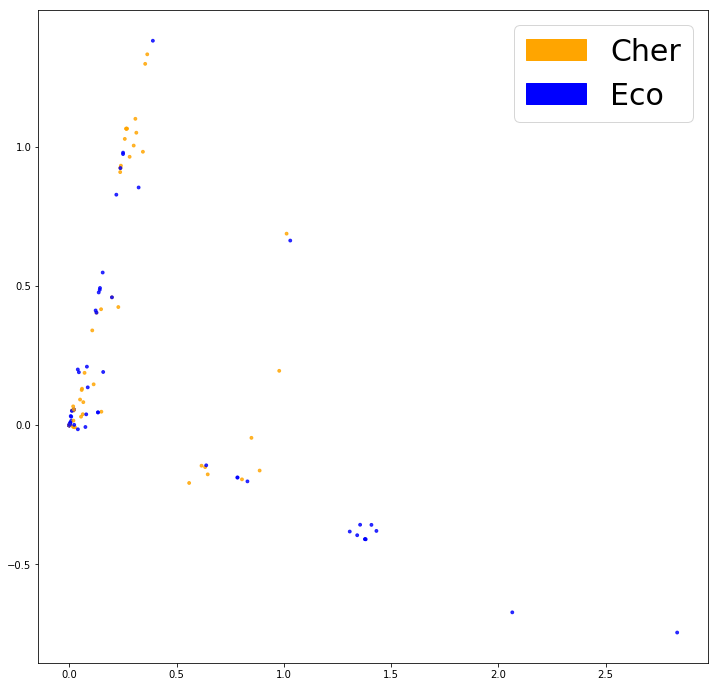

In [11]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Cher')
            green_patch = mpatches.Patch(color='blue', label='Eco')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(12, 12)) 
plot_LSA(X_train_counts, y_train)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)
y_predicted_counts

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.594, precision = 0.524, recall = 0.594, f1 = 0.556


d:\code\ml\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\code\ml\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

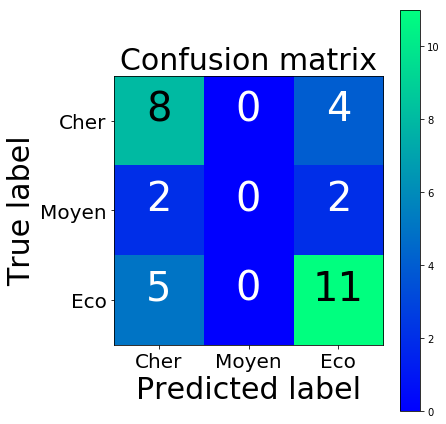

[[ 8  0  4]
 [ 2  0  2]
 [ 5  0 11]]


In [15]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(6, 6))
plot = plot_confusion_matrix(cm, classes=['Cher','Moyen','Eco'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [16]:
def get_most_important_features(vectorizer, model, n=50):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)
importance

{0: {'bottom': [(-1.6043542909815185, 'peu'),
   (-1.8929744469233447, 'marché'),
   (-1.905236905932846, 'moins'),
   (-1.9134053634977466, 'raisoonable'),
   (-1.9502337599139492, 'portuguais'),
   (-1.9510662630087727, 'abordable'),
   (-2.093839235344069, 'burger'),
   (-2.5545773355573105, 'rapport'),
   (-2.564690906816648, 'troquet'),
   (-2.894670999138528, 'prix')],
  'tops': [(1.6283447768227948, 'caviar'),
   (1.6283447768227948, 'huitre'),
   (1.6283447768227948, 'luxe'),
   (1.6381907063780943, 'étoilé'),
   (1.6695474739434915, 'luxueux'),
   (1.8217847123159676, 'plus'),
   (1.9516882011828327, 'grand'),
   (1.976978826244377, 'haut'),
   (2.1699890052787034, 'cent'),
   (2.7976128107164002, 'bon')]},
 1: {'bottom': [(-0.7394553951007813, 'pour'),
   (-0.7458481680772548, 'la'),
   (-0.8264100480183282, 'modique'),
   (-0.8312908627368005, 'plutôt'),
   (-0.8387465585044028, 'fous'),
   (-1.0534150599417869, 'vil'),
   (-1.0694858774822733, 'king'),
   (-1.14156962572989

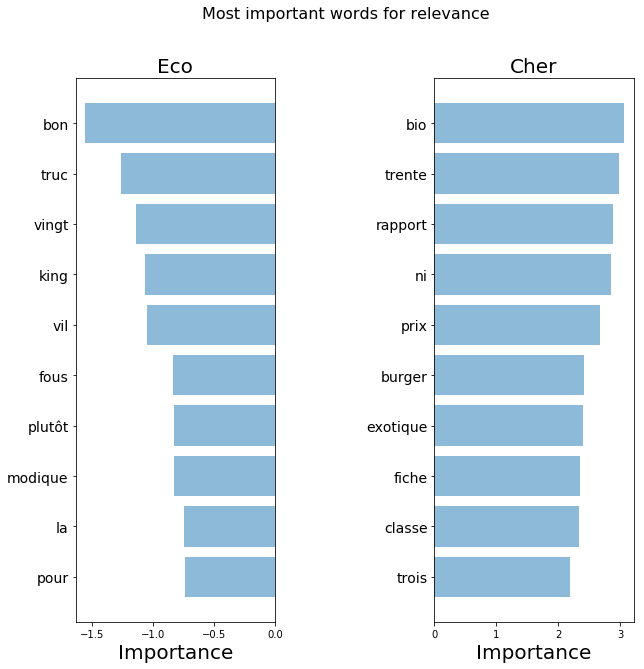

In [17]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Eco', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Cher', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [18]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

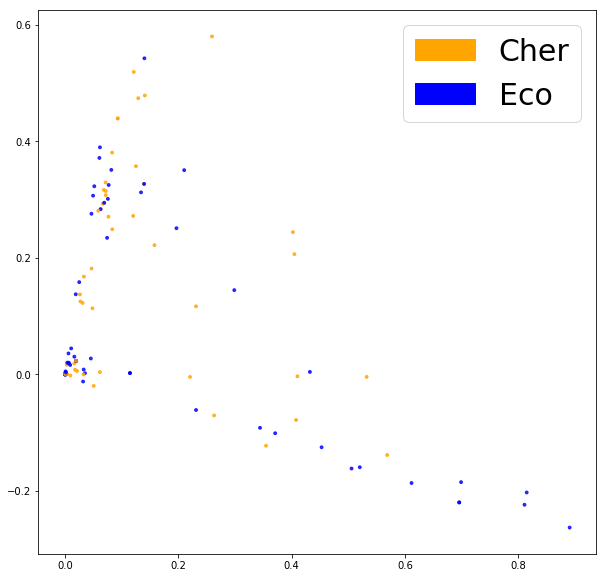

In [19]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [20]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [21]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.562, precision = 0.559, recall = 0.562, f1 = 0.555


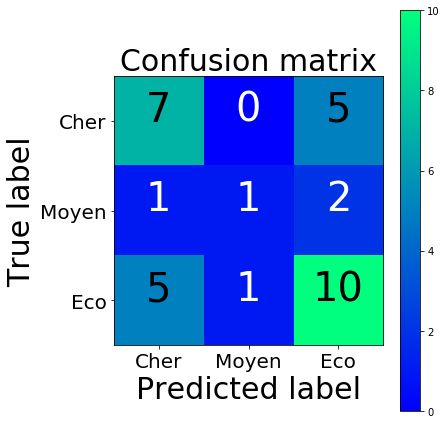

TFIDF confusion matrix
[[ 7  0  5]
 [ 1  1  2]
 [ 5  1 10]]
BoW confusion matrix
[[ 8  0  4]
 [ 2  0  2]
 [ 5  0 11]]


In [22]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(6, 6))
plot = plot_confusion_matrix(cm2, classes=['Cher','Moyen','Eco'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [23]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

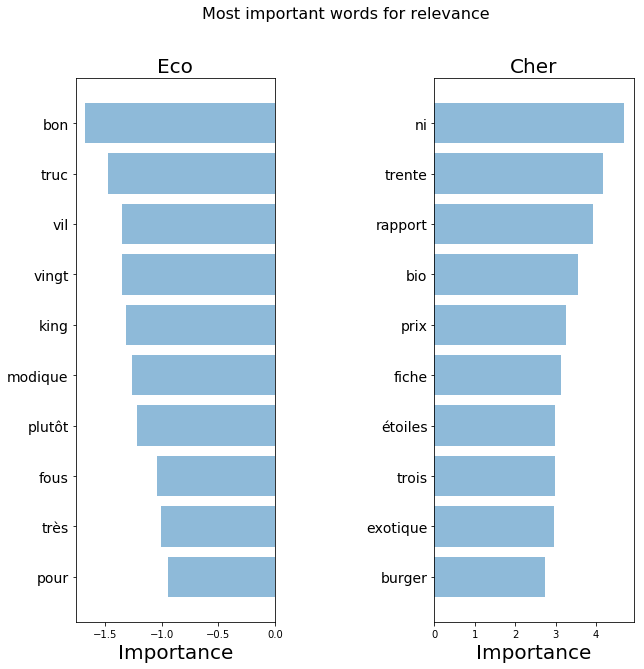

In [24]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")